# Playgroud

## 1. Tensorflow keras model

In [72]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np

### 1) Sequential Modeling

In [73]:
# sequential constructor
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [74]:
# sequential add
model = keras.Sequential()
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))

가중치 확인

In [75]:
model.weights

[]

build 메서드 호출 전에는 가중치가 없다  

가중치를 만들기 위해 모델을 호출한다

In [76]:
model.build(input_shape=(None, 3)) # 크기가 3인 샘플을 기대한다. 입력 크기의 None 은 어떤 배치 크기도 가능하다는 의미이다.
model.weights

[<KerasVariable shape=(3, 64), dtype=float32, path=sequential_8/dense_58/kernel>,
 <KerasVariable shape=(64,), dtype=float32, path=sequential_8/dense_58/bias>,
 <KerasVariable shape=(64, 10), dtype=float32, path=sequential_8/dense_59/kernel>,
 <KerasVariable shape=(10,), dtype=float32, path=sequential_8/dense_59/bias>]

build 메서드 호출 후 만들어진 것을 볼 수 있다  

summay 메서드를 호출하여 모델 구조를 출력할 수 있다

In [77]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_58 (Dense)                │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 906 (3.54 KB)

 Trainable params: 906 (3.54 KB)

 Non-trainable params: 0 (0.00 B)

모델의 layer 타입과 shape, parameter 수를 확인할 수 있다  

모델과 layer에 이름을 지정할 수도 있다

In [78]:
model = keras.Sequential(name="chanmodel")
model.add(layers.Dense(10, activation="relu", name="first dense layer"))
model.add(layers.Dense(10, activation="relu", name="second dense layer"))
model.build((None, 3))
model.summary()

Model: "chanmodel"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ first dense layer (Dense)       │ (None, 10)             │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ second dense layer (Dense)      │ (None, 10)             │           110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 150 (600.00 B)

 Trainable params: 150 (600.00 B)

 Non-trainable params: 0 (0.00 B)

모델의 build 메서드를 호출하기 전까지는 summary를 통해 확인할 수 없다  

모델을 정의할 때 모델의 가중치를 바로 생성하는 방법이 있는데 Input 에 해당하는 Layer를 추가해 주면 된다

In [79]:
model = keras.Sequential([
    layers.Input(shape=(3,)),
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")
], name="chanmodel")
print(model.weights)
model.summary()

[<KerasVariable shape=(3, 64), dtype=float32, path=chanmodel/dense_60/kernel>, <KerasVariable shape=(64,), dtype=float32, path=chanmodel/dense_60/bias>, <KerasVariable shape=(64, 10), dtype=float32, path=chanmodel/dense_61/kernel>, <KerasVariable shape=(10,), dtype=float32, path=chanmodel/dense_61/bias>]


Model: "chanmodel"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_60 (Dense)                │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_61 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 906 (3.54 KB)

 Trainable params: 906 (3.54 KB)

 Non-trainable params: 0 (0.00 B)

바로 가중치가 생성되는 것을 확인할 수 있다  

다만 모델의 첫 레이어에 `layers.Dense(64, activation="relu", input_shape=(3,)),` 처럼 input shape 을 지정해 줄 수 있지만 권장되는 방법은 아니다


### 2) Functional API Modeling

* Sequential 모델은 간단하고 사용하기 쉽지만 제한적인 요소가 있다.  
* 하나의 입력과 하나의 출력만을 가지기 때문에 `다중입력`, `다중출력`과 같이 복잡한 구현을 할 수 없다.  
* 이런 보다 복잡한 구조를 다룰 때는 `Functional API`를 이용하여 구현하는 것이 가능하다.  

간단한 함수형 모델을 구현해보자

In [80]:
inputs = layers.Input(shape=(3,))
dense_layer_1 = layers.Dense(64, activation="relu")
output_layer = layers.Dense(10, activation="softmax")

위 처럼 layer를 각각 생성해 두고 각 레이어 별로 입력과 출력을 직접 연결해주면 된다  

입력은 `__call__` 메서드를 호출해주면 된다 

In [81]:
out_layer_1 = dense_layer_1(inputs)
outputs = output_layer(out_layer_1)

위와 같이 구현하면 된다  

이렇게 구현한 구조를 keras Model 모듈로 래핑해주면 된다  

`keras.Model`생성자에 inputs, outputs 에 해당하는 layers를 인자로 넘겨주면 된다  

In [82]:
model = keras.Model(inputs=inputs, outputs=outputs)
print(model.weights)
model.summary()

[<KerasVariable shape=(3, 64), dtype=float32, path=dense_62/kernel>, <KerasVariable shape=(64,), dtype=float32, path=dense_62/bias>, <KerasVariable shape=(64, 10), dtype=float32, path=dense_63/kernel>, <KerasVariable shape=(10,), dtype=float32, path=dense_63/bias>]


Model: "functional_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_17 (InputLayer)     │ (None, 3)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_62 (Dense)                │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_63 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 906 (3.54 KB)

 Trainable params: 906 (3.54 KB)

 Non-trainable params: 0 (0.00 B)

아래와 같이 한번에 작성할 수 있다

In [83]:
inputs = layers.Input(shape=(3,))
out_layer_1 = layers.Dense(64, activation="relu")(inputs)
outputs = layers.Dense(10, activation="softmax")(out_layer_1)
model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "functional_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_18 (InputLayer)     │ (None, 3)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_64 (Dense)                │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_65 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 906 (3.54 KB)

 Trainable params: 906 (3.54 KB)

 Non-trainable params: 0 (0.00 B)

여기에서 각 layer는 입력에 대한 사양을 알고 있다  

`__call__` 메서드로 Input 객체에서부터 입력에 대한 shape 이 전해졌기 때문이다

In [84]:
inputs.shape, out_layer_1.shape, outputs.shape

((None, 3), (None, 64), (None, 10))

이런 객체를 `심볼릭 텐서`라고 한다.  
실제 데이터를 가지고 있지 않지만 사용할 때 모델이 보게 될 데이터 텐서의 사양이 인코딩 되어있는 것이다  

다음으로 다중 입력과 다중 출력 모델링에 대해서 다뤄보자

수행할 태스크의 정의부터 시작해보자  

이메일의 분류 및 위험 평가하는 태스크가 있다고 해보자  

* 입력
  - 제목(vocab size 10000)
  - 내용(vocab size 10000)
  - 파일 첨부 갯수(스칼라)
* 출력
  - 이메일이 해당하는 범주 [광고, 소셜, SNS, 일반]
  - 보안에 위협이 되는 메일인지 아닌지를 판단하는 0과 1사이의 스칼라 값

입력과 출력을 정의해보자

In [85]:
# 입력
vocab_size = 10_000
filecnt_size = 1

# 출력
email_category_size = 4
security_size = 1

input layer를 생성

In [86]:
# input layers
title_inputs = layers.Input(shape=(vocab_size,), name="title")
content_inputs = layers.Input(shape=(vocab_size,), name="content")
filecnt_inputs = layers.Input(shape=(filecnt_size,), name="file count")

간단한 Functional API 모델링을 해보자

In [87]:
features = layers.Concatenate()([title_inputs, content_inputs, filecnt_inputs])
features = layers.Dense(64, activation="relu")(features)

category_output = layers.Dense(email_category_size, activation="softmax", name="category")(features)
security_output = layers.Dense(security_size, activation="sigmoid", name="security")(features)

model = keras.Model(inputs=[title_inputs, content_inputs, filecnt_inputs], 
            outputs=[category_output, security_output])

위 첫번째 라인에서 각 입력을 모델 인풋으로 넣기 전에 하나의 입력으로 concat 해주었다. 이 경우 shape과 axis를 고려해야한다  

그리고 각각의 입력과 출력이 구성된 것을 볼 수 있다  

모델의 구조를 출력해보자

In [88]:
model.summary()

Model: "functional_28"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ title (InputLayer)  │ (None, 10000)     │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ content             │ (None, 10000)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ file count          │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_10      │ (None, 20001)     │          0 │ title[0][0],      │
│ (Concatenate)       │                   │            │ content[0][0],    │
│                     │                   │            │ file count[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_66 (Dense)    │ (None, 64)        │  1,280,128 │ concatenate_10[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ category (Dense)    │ (None, 4)         │        260 │ dense_66[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ security (Dense)    │ (None, 1)         │         65 │ dense_66[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,280,453 (4.88 MB)

 Trainable params: 1,280,453 (4.88 MB)

 Non-trainable params: 0 (0.00 B)

Functional API도 Sequential API를 훈련하는 것과 거의 같은 방법으로 훈련할 수 있다  

더미데이터를 만들어 훈련해보자

In [89]:
n_samples = 1000

# 더미 입력 데이터
title_data = np.random.randint(0, 2, size=(n_samples, vocab_size))
contant_data = np.random.randint(0, 2, size=(n_samples, vocab_size))
filecnt_data = np.random.randint(0, 10, size=(n_samples, filecnt_size))

# 더미 타겟 데이터
category_data = np.random.randint(0, 12, size=(n_samples, email_category_size))
security_data = np.random.random(size=(n_samples, security_size))

model.compile(optimizer="rmsprop", 
              loss=["categorical_crossentropy", "mean_squared_error"],
              metrics=[["accuracy"], ["mean_squared_error"]])

model.fit([title_data, contant_data, filecnt_data], 
          [category_data, security_data],
          epochs=1)

model.evaluate([title_data, contant_data, filecnt_data], 
               [category_data, security_data])

category_pred, security_pred = model.predict([title_data, contant_data, filecnt_data])


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - category_accuracy: 0.2097 - loss: 1268.5391 - security_mean_squared_error: 0.2815
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - category_accuracy: 0.2113 - loss: 4418.4185 - security_mean_squared_error: 0.3156 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


입력 순서에 신경쓰고 싶지 않다면 Input 객체와 출력층에 부여한 이름을 활용해서 딕셔너리 데이터로 전달할 수도 있다  

In [90]:
n_samples = 1000

# 더미 입력 데이터
title_data = np.random.randint(0, 2, size=(n_samples, vocab_size))
contant_data = np.random.randint(0, 2, size=(n_samples, vocab_size))
filecnt_data = np.random.randint(0, 10, size=(n_samples, filecnt_size))

# 더미 타겟 데이터
category_data = np.random.randint(0, 12, size=(n_samples, email_category_size))
security_data = np.random.random(size=(n_samples, security_size))

# 이름으로 딕셔너리 매핑
model.compile(optimizer="rmsprop", 
                loss={ "category": "categorical_crossentropy", "security": "mean_squared_error" },
                metrics={ "category": ["accuracy"], "security": ["mean_squared_error"] })

model.fit({ "title": title_data, "content": contant_data, "file count": filecnt_data }, 
            { "category" : category_data, "security": security_data },
            epochs=1)

model.evaluate({ "title": title_data, "content": contant_data, "file count": filecnt_data }, 
                { "category" : category_data, "security": security_data })

category_pred, security_pred = model.predict({ 
                                                "title": title_data, 
                                                "content": contant_data, 
                                                "file count": filecnt_data 
                                            })


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - category_accuracy: 0.2186 - loss: 5781.8745 - security_mean_squared_error: 0.3319
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - category_accuracy: 0.2333 - loss: 9247.7764 - security_mean_squared_error: 0.3277
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


Functional 모델은 여러 레이어가 복잡하게 연결된 그래프 구조이다.  
층이 어떻게 연결되어 있는지 조사하고 이전 그래프 노트를 새 모델의 일부로 재사용할 수 있다.  
이전에 정의한 모델의 연결 구조(모델의 토폴로지)를 시각화 해보자.

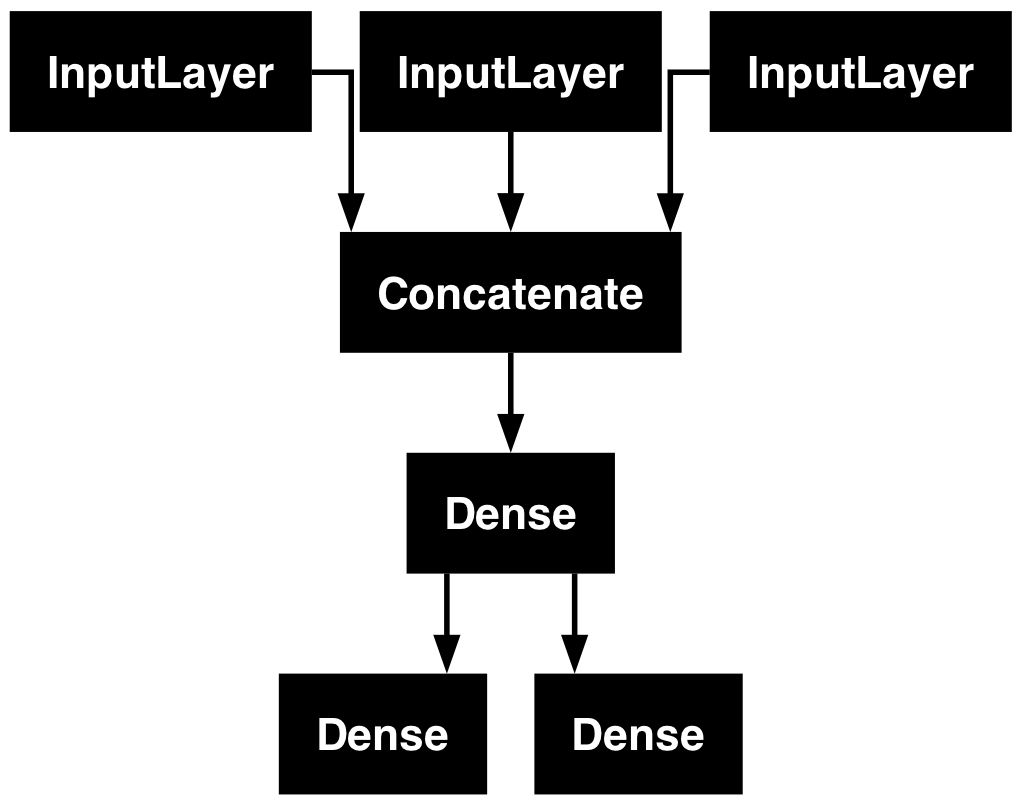

In [91]:
keras.utils.plot_model(model)

위와 깉이 함수형 모델을 그래프로 그릴 수 있다  

shape도 포함하여 시각화면 더 많은 내용을 확인할 있어 디버깅에 도움이 될 수 있다

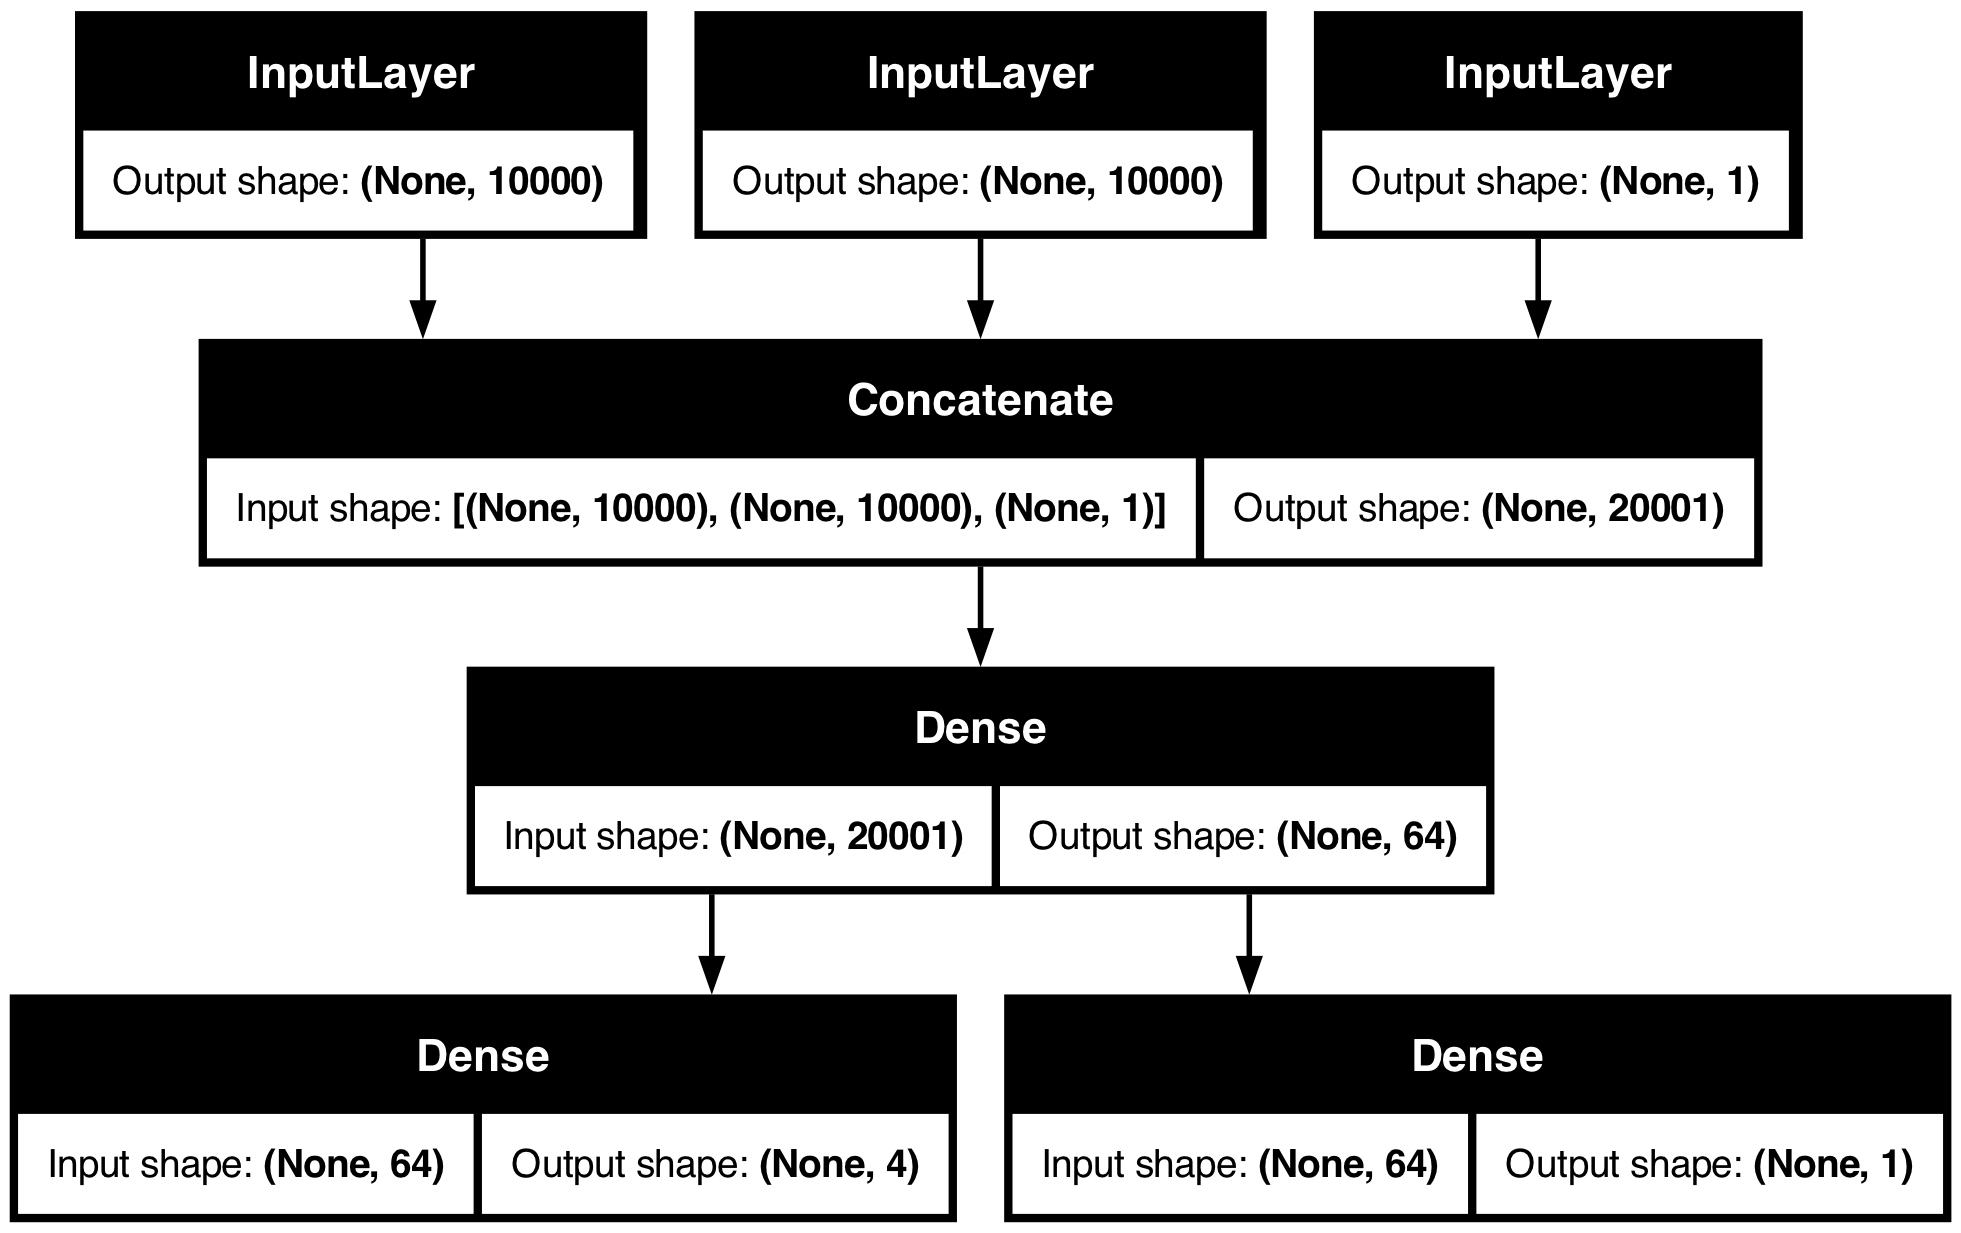

In [92]:
keras.utils.plot_model(model, show_shapes=True)

model.layers 속성은 모델에 있는 모든 레이어의 리스트를 갖고 있다.  
각 측에 대해 layer.input과 layer.output을 출력해 볼 수 있다.

In [93]:
model.layers

[<InputLayer name=title, built=True>,
 <InputLayer name=content, built=True>,
 <InputLayer name=file count, built=True>,
 <Concatenate name=concatenate_10, built=True>,
 <Dense name=dense_66, built=True>,
 <Dense name=category, built=True>,
 <Dense name=security, built=True>]

In [94]:
model.layers[3].input

[<KerasTensor shape=(None, 10000), dtype=float32, sparse=None, name=title>,
 <KerasTensor shape=(None, 10000), dtype=float32, sparse=None, name=content>,
 <KerasTensor shape=(None, 1), dtype=float32, sparse=None, name=file count>]

In [95]:
model.layers[3].output

<KerasTensor shape=(None, 20001), dtype=float32, sparse=False, name=keras_tensor_74>

이를 통해 특성 추출을 수행하여 다른 모델에서 중간 특성을 재사용하는 모델을 만들 수 있다  

이전 모델에 또 다른 출력을 추가한다고 가정해보자  

메일을 읽는데 걸리는 시간을 추정한다고 해보자

In [96]:
features = model.layers[4].output # 중간 Dense 층
time_output = layers.Dense(1, name="time")(features)
new_model = keras.Model(inputs=[title_inputs, content_inputs, filecnt_inputs],
                                outputs=[category_output, security_output, time_output])

새 모델을 그래프로 출력해보자

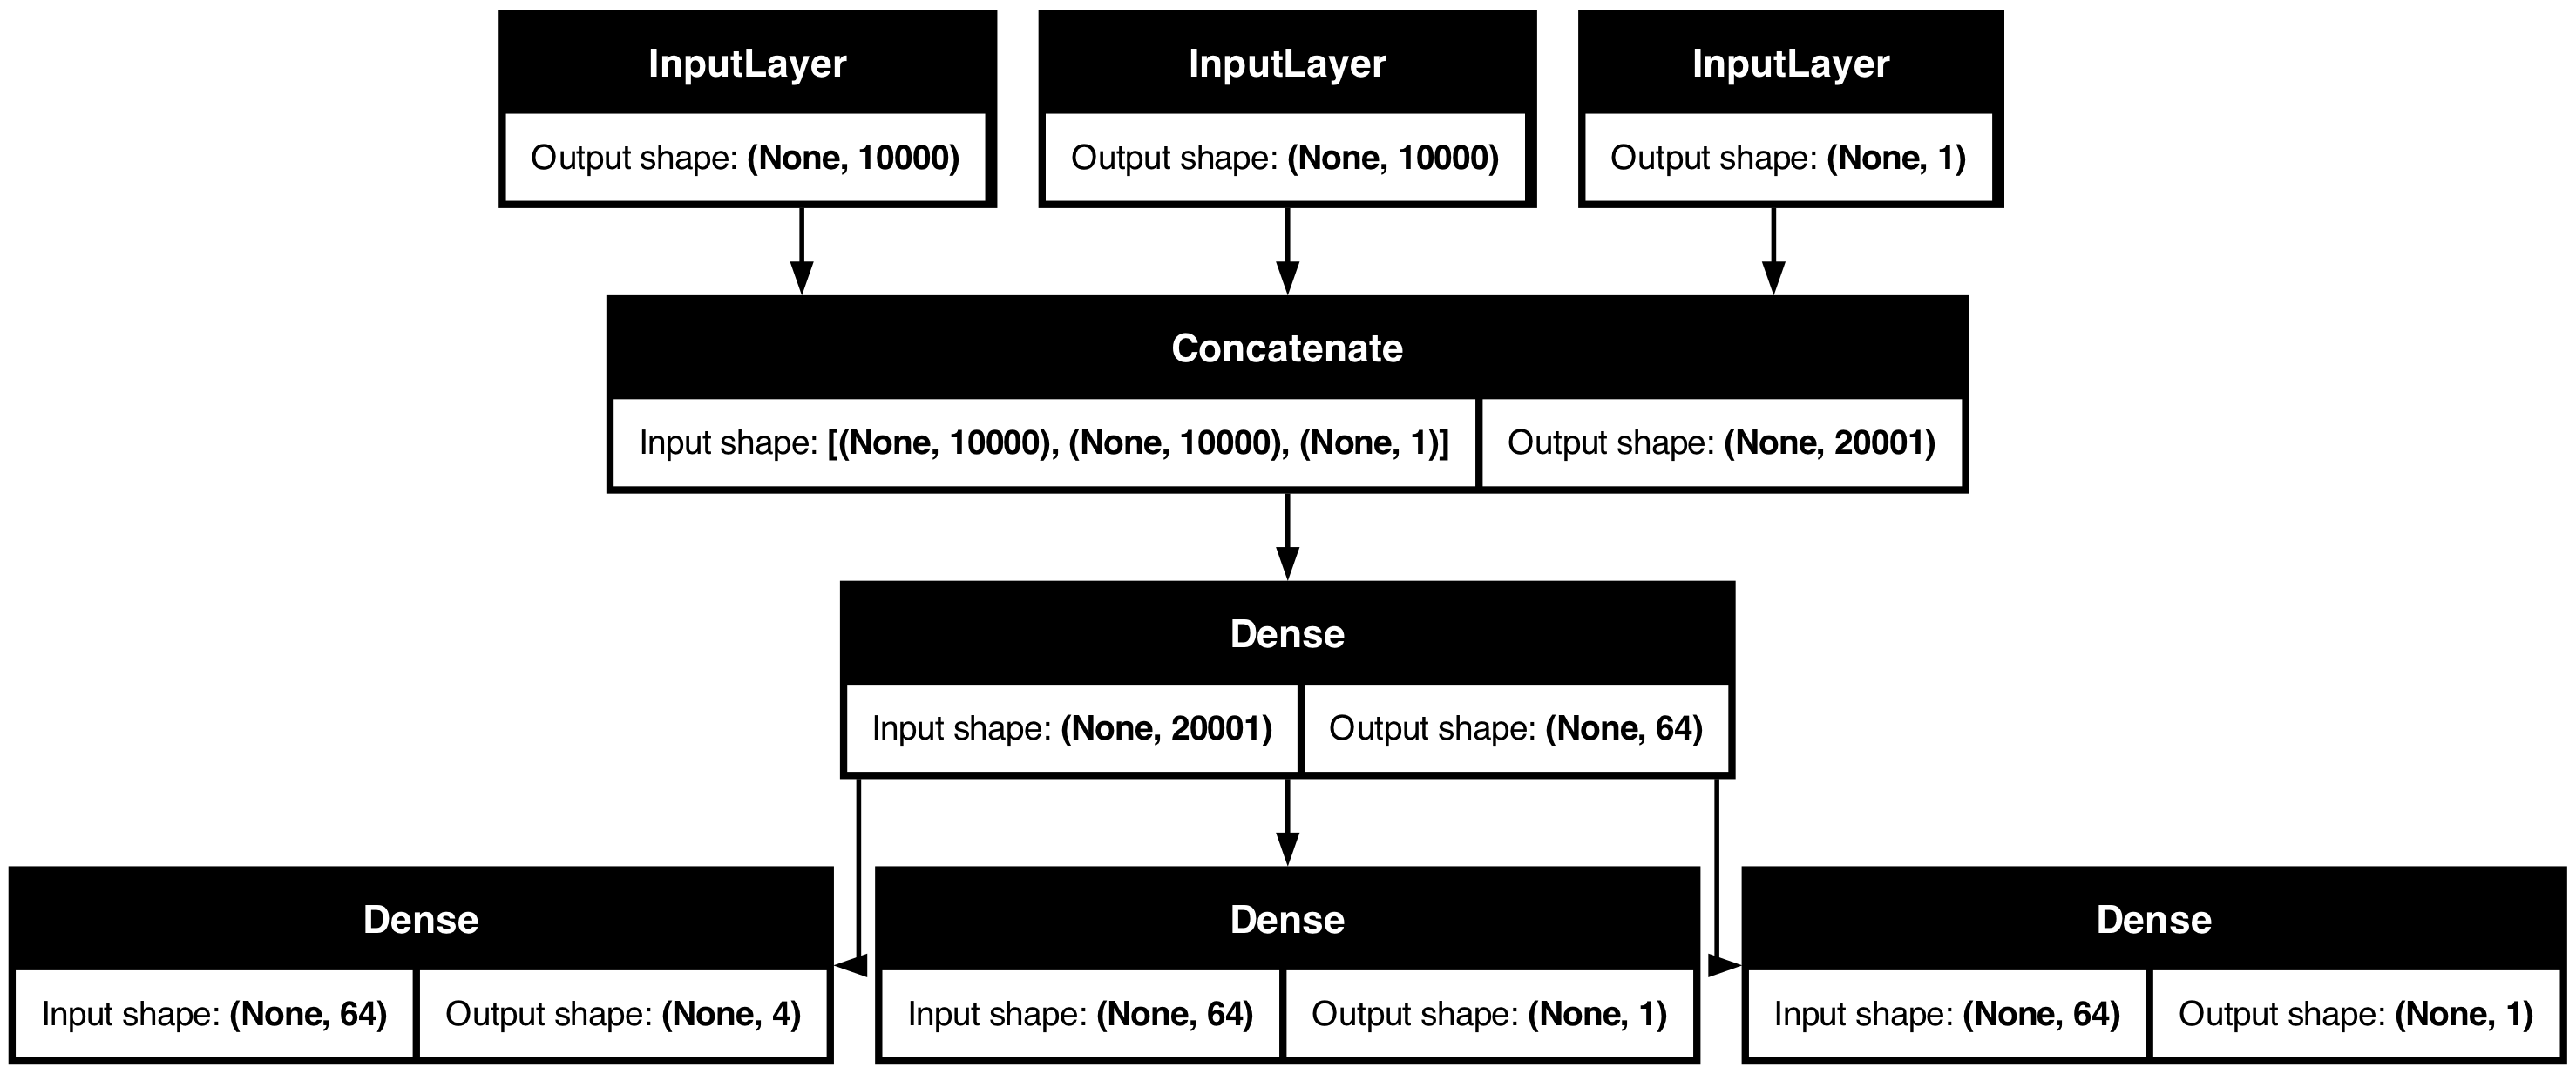

In [97]:
keras.utils.plot_model(new_model, show_shapes=True)

### 3) Model Subclassing

이전 예제를 서브클래싱 모델로 다시 만들어본다

In [98]:
class EmailModel(keras.Model):
    
    def __init__(self, n_categories):
        super().__init__()
        self.concat_layer = layers.Concatenate()
        self.mixing_layer = layers.Dense(64, activation="relu")
        self.category_classifier = layers.Dense(n_categories, activation="softmax")
        self.security_whether = layers.Dense(1, activation="sigmoid")

    def call(self, inputs):
        title, content, filecnt = inputs["title"], inputs["content"], inputs["file count"]
        x = self.concat_layer([title, content, filecnt])
        x = self.mixing_layer(x)
        category_output = self.category_classifier(x)
        security_output = self.security_whether(x)
        return category_output, security_output

Layer 클래스와 마찬가지로 어떤 데이터로 처음 호출할 때 가중치를 만든다

In [116]:
model = EmailModel(n_categories=4)
category_pred, security_pred = model({ "title": title_data, "content": contant_data, "file count": filecnt_data })

model.compile(optimizer="rmsprop", 
                loss=["categorical_crossentropy", "mean_squared_error"],
                metrics=[["accuracy"], ["mean_absolute_error"]])

model.fit({ "title": title_data, "content": contant_data, "file count": filecnt_data }, 
            [category_data, security_data],
            epochs=1)

model.evaluate({ "title": title_data, "content": contant_data, "file count": filecnt_data }, 
                [category_data, security_data])

category_pred, security_pred = model.predict({ 
                                                "title": title_data, 
                                                "content": contant_data, 
                                                "file count": filecnt_data 
                                            })

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2502 - loss: 704.5796 - mean_absolute_error: 0.4485
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2611 - loss: 2047.9487 - mean_absolute_error: 0.4992 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


### 4) 사용자 정의 훈련 스텝을 사용하는 모델

In [ ]:
from tensorflow.keras.datasets import mnist

def get_mnist_model():
    inputs = keras.Input(shape=(28 * 28,))
    features = layers.Dense(512, activation="relu")(inputs)
    features = layers.Dropout(0.5)(features)
    outputs = layers.Dense(10, activation="softmax")(features)
    model = keras.Model(inputs, outputs)
    return model

(images, labels), (test_images, test_labels) = mnist.load_data()
images = images.reshape((60000, 28 * 28)).astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28)).astype("float32") / 255
train_images, val_images = images[10000:], images[:10000]
train_labels, val_labels = labels[10000:], labels[:10000]

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

class CustomModel(keras.Model):
    def train_step(self, data):
        inputs, targets = data
        with tf.GradientTape() as tape:
            predictions = self(inputs, training=True)
            loss = self.compiled_loss(targets, predictions)
        gradients = tape.gradient(loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(gradients, self.trainable_weights))
        self.compiled_metrics.update_state(targets, predictions)
        return {m.name: m.result() for m in self.metrics}

inputs = keras.Input(shape=(28 * 28,))
features = layers.Dense(512, activation="relu")(inputs)
features = layers.Dropout(0.5)(features)
outputs = layers.Dense(10, activation="softmax")(features)
model = CustomModel(inputs, outputs)

model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=[keras.metrics.SparseCategoricalAccuracy()])
model.fit(train_images, train_labels, epochs=3)

## 2. Neural Network Playground 실험
* 다음의 사이트에서 제공하는 playground 환경에서 실험을 진행하고 정리한다. https://playground.tensorflow.org 
* 목적은 data type 4에 대한 Classification 최적의 조합을 찾는 것이다.

### 실험 가이드
* 레이어
  - 깊이(2~6), 넓이(2~6)
* learning rate
  - 1 ~ 1e-3
* activation function
  - ReLU, Tanh, Sigmoid, Linear
* 기본 하이퍼파라미터
  - test size: 20%
  - noise: 10, 50
  - batch size: 16
* 학습 방법
  - 분류 가능 여부
  - 수렴한다면 몇 epoch 정도에 수렴하는지

### # Features: X1, X2
---
레이어 2
* 함수 Tanh
  - 넓이 [2, 2]
    - LR 0.1
      + test loss 485
    - LR 0.01
      + test loss 0.5
  - 넓이 [3, 3]
    - LR 0.1
      + test loss 0.520
    - LR 0.01
      + test loss 0.5
---
레이어 3
* 함수 Tanh
  - 넓이 [2, 2, 2]
    - LR 0.1 
    - LR 0.01
    - LR 0.001
  - 넓이 [4, 4, 4]
    - LR 0.1
      - test loss 0.461
    - LR 0.01
      - test loss 0.479
    - LR 0.001
      - test loss 0.495
---
레이어 6
* 함수 Tanh
  - 넓이 [2, 2, 2, 2, 2, 2]
    - LR 0.1 
      - test loss 0.477
    - LR 0.01
      - test loss 0.502
    - LR 0.001
  - 넓이 [4, 4, 4, 4, 4, 4]
    - LR 0.1
      - test loss 0.476
    - LR 0.01
      - test loss 0.477
    - LR 0.001
      - test loss 0.503

### # Features: X1, X2, sinX1, sinX2
---
레이어 3
* 함수 Tanh
  - 넓이 [2, 2, 2]
    - LR 0.1 
      - test loss 0.4
    - LR 0.01
      - test loss 0.477
    - LR 0.001
      - test loss 0.5
  - 넓이 [4, 4]
    - LR 0.1
      - test loss 0.144
    - LR 0.01
      - test loss 0.237
    - LR 0.001
      - test loss 0.478 (2000)
  - 넓이 [8, 8]
    - LR 0.1
      - test loss 0.156
    - LR 0.01
      - test loss 0.052
    - LR 0.001
      - test loss 0.471 (2000)
---
레이어 6
* 함수 Tanh
  - 넓이 [2, 2, 2, 2, 2, 2]
    - LR 0.1 
      - test loss 0.435
    - LR 0.01
      - test loss 0.5
  - 넓이 [4, 4, 4, 4, 4, 4]
    - LR 0.1
      - test loss 0.457
    - LR 0.01
      - test loss 0.478 (2000)
  - 넓이 [6, 6, 6, 6, 6, 6]
    - LR 0.1
      - test loss 0.051
    - LR 0.01
      - test loss 0.05
  - 넓이 [4, 5, 6, 6, 5, 4]
    - LR 0.1
      - test loss 0.359
    - LR 0.01
      - test loss 0.478

Feature 더 있을 때 분류를 더 잘 한것을 볼 수 있었다.

## 3. 회고
* Tensorflow의 여러 모델링 구현 방법을 학습할 수 있어서 유익했습니다.
* 여러 실험에 대한 진행 방식과 내용에 대해 듣고 좋은 인사이트를 얻을 수 있었다.
* 시간이 부족해서 더 많은 실험을 해보지 못해 아쉬웠다.

## 